In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [2]:
file_path = 'Result-Experiment1.csv'
df = pd.read_csv(file_path)

In [3]:
df = df.iloc[1:]

x = df['ML Lab']
y = df['Unnamed: 6']

In [4]:
mask = ~(x.isin(['DB', 'AB']) | y.isin(['DB', 'AB']) | x.isna() | y.isna())
x = x[mask]
y = y[mask]

In [5]:
x = pd.to_numeric(x, errors='coerce')
y = pd.to_numeric(y, errors='coerce')

In [6]:
mask = ~(x.isna() | y.isna())
x = x[mask]
y = y[mask]

In [7]:
print("Summary statistics after cleaning:")
print("Internal marks (x):")
print(x.describe())
print("\nExternal marks (y):")
print(y.describe())
print(f"\nNumber of data points: {len(x)}")

Summary statistics after cleaning:
Internal marks (x):
count    60.000000
mean     30.341667
std       7.573645
min      22.500000
25%      23.500000
50%      29.000000
75%      33.125000
max      48.000000
Name: ML Lab, dtype: float64

External marks (y):
count    60.000000
mean     33.766667
std       3.683986
min      28.000000
25%      30.750000
50%      33.000000
75%      37.000000
max      42.000000
Name: Unnamed: 6, dtype: float64

Number of data points: 60



Model Results:
Model Coefficient (Slope): 0.3394
Model Intercept: 23.8578
Training Mean Squared Error: 8.1272
Testing Mean Squared Error: 13.8248
Training R² Score: 0.4094
Testing R² Score: -0.4692


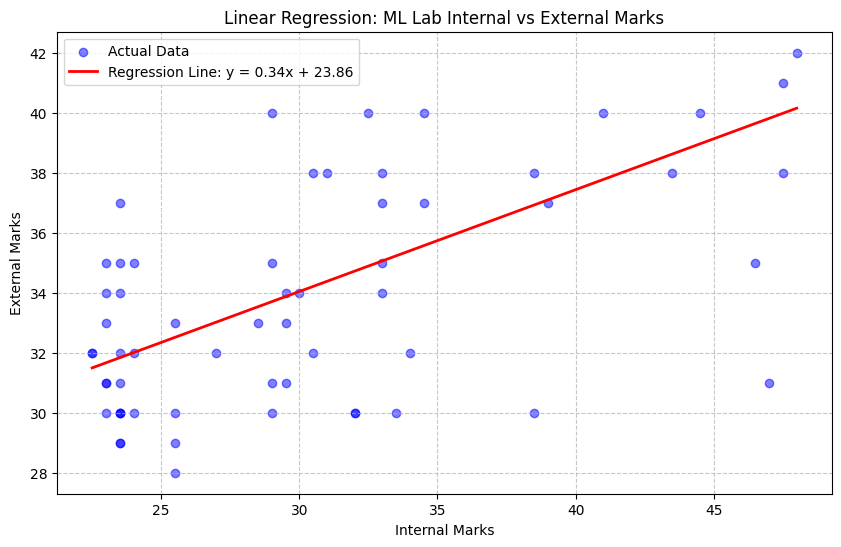

In [8]:
X = x.values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print("\nModel Results:")
print(f"Model Coefficient (Slope): {model.coef_[0]:.4f}")
print(f"Model Intercept: {model.intercept_:.4f}")
print(f"Training Mean Squared Error: {train_mse:.4f}")
print(f"Testing Mean Squared Error: {test_mse:.4f}")
print(f"Training R² Score: {train_r2:.4f}")
print(f"Testing R² Score: {test_r2:.4f}")

plt.figure(figsize=(10, 6))

plt.scatter(X, y, color='blue', alpha=0.5, label='Actual Data')

X_line = np.array([min(X.flatten()), max(X.flatten())]).reshape(-1, 1)
y_line = model.predict(X_line)
plt.plot(X_line, y_line, color='red', linewidth=2, label=f'Regression Line: y = {model.coef_[0]:.2f}x + {model.intercept_:.2f}')

plt.title('Linear Regression: ML Lab Internal vs External Marks')
plt.xlabel('Internal Marks')
plt.ylabel('External Marks')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()